# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE! 
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
# Fetch current ETH price
# YOUR CODE HERE!
def get_crypto_price(ticker):
    url = f"https://api.alternative.me/v2/ticker/{ticker}/?convert=CAD"
    response=requests.get(url).content
    data=json.loads(response.decode('utf-8'))
    price=data['data'][next(iter(data['data']))]['quotes']['CAD']['price']
    return price
btc_price=get_crypto_price('Bitcoin')
eth_price=get_crypto_price('Ethereum')
print(btc_price,eth_price)


59960.6072 4263.336272


In [6]:

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71952.73
The current value of your 5.3 ETH is $22595.68


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-03-25", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
# from alpaca_trade_api import TimeFrame
stock_price=alpaca.get_bars(tickers,timeframe,today,adjustment='raw').df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY_price=stock_price.loc[stock_price['symbol']=='SPY']
AGG_price=stock_price.loc[stock_price['symbol']=='AGG']

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
stock_price=pd.concat([SPY_price,AGG_price],axis=1,keys=['SPY','AGG'])
# Preview DataFrame
# YOUR CODE HERE!

stock_price.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-03-25 04:00:00+00:00  451.09  452.98  448.43  452.69  77199328   
2022-03-28 04:00:00+00:00  452.04  455.91  450.06  455.91  67020054   

                                                             AGG            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2022-03-25 04:00:00+00:00      661033  451.047221    SPY  106.65  106.6500   
2022-03-28 04:00:00+00:00      617181  453.254526    SPY  106.25  106.5252   

                                                                              \
                               low   close    volume trade_count        vwap   
timestamp                                                                      
2022-03-25 04:00:00+00:00  105.975  106.10  10295813       37569  106.190724   
2022-03-28 04:00:00+00:00  106.160  106.36   8512956       27227  106.295709   

                                  
                          symbol  
timestamp                         
2022-03-25 04:00:00+00:00    AGG  
2022-03-28 04:00:00+00:00    AGG

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
# spy_close_price=list(stock_price['SPY']['close'])
spy_close_price=stock_price['SPY']['close'].iloc[0]
agg_close_price=stock_price['AGG']['close'].iloc[0]

In [11]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.1
Current SPY closing price: $452.69


In [12]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22634.50
The current value of your 200 AGG shares is $21220.00


### Savings Health Analysis

In [13]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Consolidate financial assets data
# YOUR CODE HERE!
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame({
    'asset':  ['cypto','shares'],
    'amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]
}).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
cypto,94548.410882
shares,43854.500000


<AxesSubplot:ylabel='amount'>

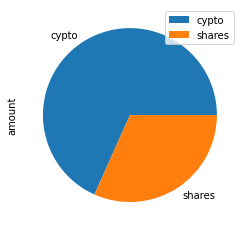

In [14]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', y="amount")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=my_spy_value+my_agg_value+my_btc_value+my_eth_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You are reaching your financial goal.")
elif total_savings < emergency_fund:
    print(f"You need to save addtional ${emergency_fund-total_savings:0.2f} to reach your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data=alpaca.get_bars(tickers,timeframe,start_date,end_date,adjustment='raw').df


In [18]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
df_stock_data_spy=df_stock_data.loc[df_stock_data['symbol']=='SPY']
df_stock_data_spy.head()

df_stock_data_agg=df_stock_data.loc[df_stock_data['symbol']=='AGG']
df_stock_data_agg.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [19]:

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data=pd.concat([df_stock_data_spy,df_stock_data_agg],axis=1,keys=['SPY','AGG'])
# Display sample data
df_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                             AGG            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2016-05-02 04:00:00+00:00      263580  207.294812    SPY  110.74  110.7400   
2016-05-03 04:00:00+00:00      377518  206.312060    SPY  110.89  110.9450   
2016-05-04 04:00:00+00:00      345261  205.090172    SPY  110.91  110.9315   
2016-05-05 04:00:00+00:00      280622  205.141555    SPY  110.92  111.1600   
2016-05-06 04:00:00+00:00      340335  204.937074    SPY  111.12  111.1200   

                                                                              \
                                low   close   volume trade_count        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  110.5200  110.61  3553939       15119  110.627199   
2016-05-03 04:00:00+00:00  110.7500  110.81  3044940       15662  110.865995   
2016-05-04 04:00:00+00:00  110.7595  110.86  2920608       13982  110.879063   
2016-05-05 04:00:00+00:00  110.8010  111.14  3008142       15707  111.028363   
2016-05-06 04:00:00+00:00  110.9700  110.97  2718710       12697  111.031967   

                                  
                          symbol  
timestamp                         
2016-05-02 04:00:00+00:00    AGG  
2016-05-03 04:00:00+00:00    AGG  
2016-05-04 04:00:00+00:00    AGG  
2016-05-05 04:00:00+00:00    AGG  
2016-05-06 04:00:00+00:00    AGG

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

# from MCForecastTools import MCSimulation
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.60,.40],
    num_simulation=500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                          AGG  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812    SPY          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    SPY    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    SPY    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    SPY    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074    SPY     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2016-05-02 04:00:00+00:00  110.627199    AGG          NaN  
2016-05-03 04:00:00+00:00  110.865995    AGG     0.001808  
2016-05-04 04:00:00+00:00  110.879063    AGG     0.000451  
2016-05-05 04:00:00+00:00  111.028363    AGG     0.002526  
2016-05-06 04:00:00+00:00  111.031967    AGG    -0.001530

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/feiyiyang/Documents/Bootcamp/Assignment/5_API_FinancialPlanning/financial-planning-tool/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002919,0.998661,0.995488,1.003831,0.984746,0.995195,1.004380,1.004827,1.005979,0.993227,...,1.001061,0.994073,1.005415,1.011239,0.998180,0.998617,1.000189,1.000858,1.009194,1.006245
2,1.007427,0.993164,1.000897,1.005584,0.982611,0.992790,1.000890,1.006714,0.996524,1.005780,...,1.003415,0.994028,1.008366,1.001186,0.999608,0.999491,0.985380,1.007853,1.003313,0.995669
3,1.001316,0.999728,0.986562,0.994972,0.982531,0.992845,1.003767,1.006315,0.991026,1.000267,...,0.993399,0.987133,1.007694,1.006658,0.989744,0.990214,0.984063,1.001406,0.988189,1.000833
4,1.006940,0.990780,0.991790,0.996628,0.986267,0.999884,1.000954,1.009255,0.984853,0.994581,...,1.005049,0.995417,1.003031,1.013851,0.994860,0.989045,0.972319,1.006777,0.988033,1.006879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.884780,18.301009,10.970929,22.952425,8.213368,37.511852,1.630245,21.777032,6.647196,32.913916,...,6.157072,8.701115,12.052559,13.545601,27.189064,16.967741,12.950582,9.071019,86.166068,19.548519
7557,20.956103,18.269954,10.955091,23.071510,8.233611,37.556422,1.623814,21.959421,6.653596,33.056203,...,6.124711,8.606127,12.052195,13.451624,27.421368,17.002170,13.053088,9.032520,86.003589,19.532901
7558,20.909268,18.309604,10.904524,22.900420,8.315259,37.321352,1.629540,21.562526,6.639112,32.943809,...,6.167849,8.677333,11.899545,13.350169,27.520592,17.086637,13.170395,9.005665,86.514482,19.613134
7559,21.085560,18.278386,10.907793,22.839715,8.317285,37.179651,1.628050,21.823398,6.591613,32.998104,...,6.207375,8.692494,11.755418,13.422155,27.534253,17.161789,13.124019,9.027662,87.989232,19.944012


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

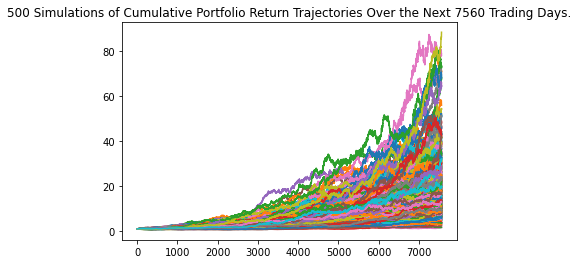

In [23]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_30year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

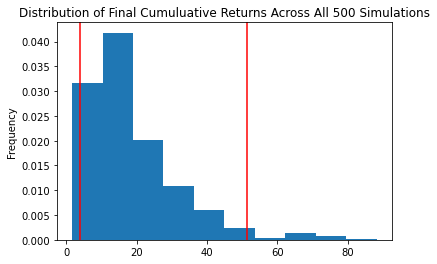

In [24]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_30year.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_30year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(MC_30year.summarize_cumulative_return())

count           500.000000
mean             18.694662
std              13.077188
min               1.628830
25%               9.898250
50%              14.752955
75%              23.704385
max              88.231003
95% CI Lower      3.895188
95% CI Upper     51.278648
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=initial_investment*MC_30year.summarize_cumulative_return()["95% CI Lower"]
ci_upper=initial_investment*MC_30year.summarize_cumulative_return()["95% CI Upper"]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77903.76 and $1025572.97


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=initial_investment*MC_30year.summarize_cumulative_return()["95% CI Lower"]
ci_upper=initial_investment*MC_30year.summarize_cumulative_return()["95% CI Upper"]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $116855.64 and $1538359.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year=MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.80,.20],
    num_simulation=500,
    num_trading_days = 252*5
)

In [42]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019265,0.988621,1.010175,0.995811,1.016223,1.000988,0.985624,1.001990,0.996595,0.981082,...,1.001846,1.009669,1.007369,0.996825,1.002748,0.987052,0.984890,0.988352,1.001626,0.999933
2,1.017873,0.993710,1.015669,0.999069,1.022953,1.001826,1.003772,1.008231,0.997262,0.984889,...,1.015354,1.008263,0.997433,0.997627,1.014554,0.996368,0.987524,0.997004,1.013906,1.001688
3,1.031511,0.976086,1.024094,1.004792,1.027098,1.003485,0.992935,1.003950,1.006588,0.981427,...,1.019988,1.000586,0.997650,0.989328,1.016054,1.014960,0.998758,0.998458,1.004311,1.016524
4,1.032243,0.972929,1.038438,0.987517,1.035758,0.988681,0.993509,1.005616,1.001093,0.984390,...,1.018961,0.992768,0.996594,0.974698,1.017516,1.012448,1.006855,0.982907,0.999311,1.021628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.999751,1.614884,3.193118,1.070588,1.652876,1.079806,1.831496,1.036418,2.277541,1.464817,...,0.956559,1.652062,2.660862,1.299950,2.581104,0.954480,4.263682,1.713488,1.708127,1.912240
1257,2.015715,1.621758,3.148403,1.082422,1.636580,1.063495,1.811653,1.056501,2.281839,1.464489,...,0.969265,1.649271,2.653279,1.272484,2.574627,0.938851,4.264318,1.746142,1.711644,1.922776
1258,2.030400,1.648665,3.174987,1.081523,1.611539,1.034188,1.807290,1.048269,2.287899,1.457490,...,0.967332,1.653727,2.645114,1.263544,2.556789,0.949420,4.273024,1.726619,1.710147,1.945999
1259,2.035350,1.664717,3.181200,1.092260,1.630546,1.028465,1.827426,1.046857,2.290596,1.467533,...,0.976890,1.663164,2.645517,1.282457,2.555876,0.936214,4.285271,1.718329,1.711712,1.924145


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

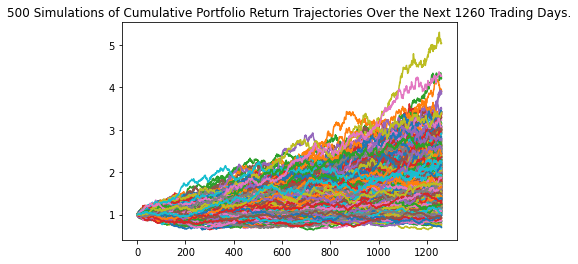

In [43]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_5year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

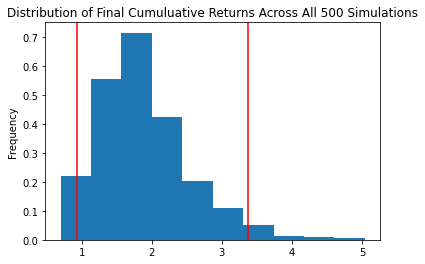

In [44]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_5year.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
print(MC_5year.summarize_cumulative_return())
# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.878017
std               0.636188
min               0.697200
25%               1.427013
50%               1.783313
75%               2.196781
max               5.040300
95% CI Lower      0.929539
95% CI Upper      3.377388
Name: 1260, dtype: float64


In [46]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_5=initial_investment*MC_5year.summarize_cumulative_return()["95% CI Lower"]
ci_upper_5=initial_investment*MC_5year.summarize_cumulative_return()["95% CI Upper"]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18590.776930441323 and $67547.76078500896


### Ten Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.80,.20],
    num_simulation=500,
    num_trading_days = 252*10
)

In [48]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/feiyiyang/Documents/Bootcamp/Assignment/5_API_FinancialPlanning/financial-planning-tool/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993807,0.987103,1.001343,1.012162,0.994341,1.000009,0.995225,0.999658,0.985595,1.002404,...,1.003247,0.978971,0.998564,0.991909,0.994635,0.996903,0.989066,0.995779,0.999258,0.988438
2,0.990561,0.991009,1.004594,1.023216,1.000221,1.000491,0.985852,0.991836,0.988611,0.998563,...,0.998339,0.973284,1.016242,1.005124,0.994397,1.006908,0.971717,0.993063,0.999392,1.004327
3,0.987278,1.009903,1.007732,1.022420,0.984012,1.020240,0.996327,0.997852,0.983944,1.003938,...,0.995848,0.978556,1.010234,0.993255,0.988714,1.015521,0.969953,1.011724,1.013376,1.004825
4,0.992733,1.001287,1.007197,1.028260,0.984689,1.023157,0.992162,0.988315,0.996096,1.006003,...,0.995611,0.970682,1.012029,0.993722,0.987700,1.022510,0.971209,1.010566,1.016726,1.007617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.324155,7.091581,5.350391,2.807790,2.477282,2.389957,1.944485,6.531580,3.770073,2.103150,...,2.928628,3.329121,1.126496,2.726438,2.568284,2.202970,5.856550,3.161953,3.122577,5.119690
2517,4.319424,7.167355,5.382004,2.837595,2.491119,2.392847,1.934481,6.411000,3.774978,2.087721,...,2.951860,3.327324,1.119111,2.742328,2.568203,2.212962,5.816670,3.167089,3.124313,5.124400
2518,4.396871,7.077069,5.446848,2.821369,2.499898,2.387159,1.912496,6.449071,3.750987,2.071988,...,3.003806,3.330211,1.126099,2.796118,2.581291,2.204255,5.742247,3.149938,3.129905,5.214057
2519,4.357791,7.221845,5.295819,2.795002,2.480681,2.378086,1.899815,6.380437,3.780543,2.065257,...,2.978164,3.299512,1.112838,2.785102,2.582398,2.235059,5.744142,3.165358,3.127427,5.193119


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

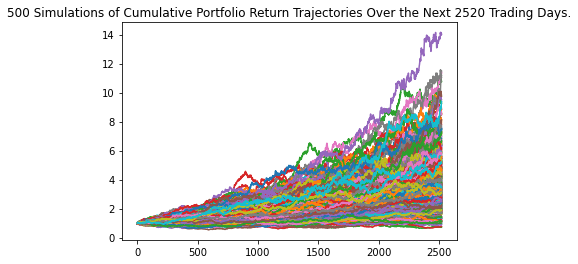

In [49]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_10year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

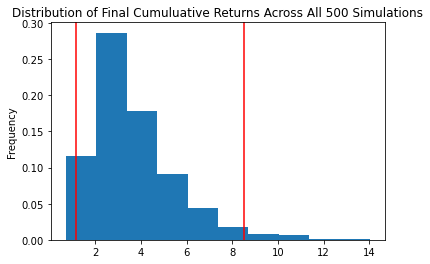

In [50]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_10year.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_10year.summarize_cumulative_return()
# Print summary statistics
print(MC_10year.summarize_cumulative_return())
# YOUR CODE HERE!

count           500.000000
mean              3.677086
std               1.883267
min               0.714099
25%               2.425587
50%               3.244904
75%               4.576038
max              14.039047
95% CI Lower      1.161843
95% CI Upper      8.513453
Name: 2520, dtype: float64


In [52]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_10=initial_investment*MC_10year.summarize_cumulative_return()["95% CI Lower"]
ci_upper_10=initial_investment*MC_10year.summarize_cumulative_return()["95% CI Upper"]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $23236.855139878717 and $170269.06511171832
